In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [19]:
#to import the dataset
file_path = "C:\\Users\\HP\\Downloads\\WorldHappiness_Corruption_2015_2020.csv"
data = pd.read_csv(file_path)
#to display top 10 rows of the data
display(data.head(15))

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90
5,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Europe,2015,0.0,84
6,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America,2015,0.0,83
7,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia,2015,0.0,91
8,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Europe,2015,0.0,89
9,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Australia,2015,0.0,79


In [37]:
#this step is to clean the data
#finding null values
data_dropped = data.dropna()
data_dropped.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [41]:
#another method to check if any null values present in the entire data set
data_dropped.isnull().values.any()

False

In [43]:
#to clean the data by finding duplicate rows
duplicate_rows = data.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
787    False
788    False
789    False
790    False
791    False
Length: 792, dtype: bool


In [45]:
data.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


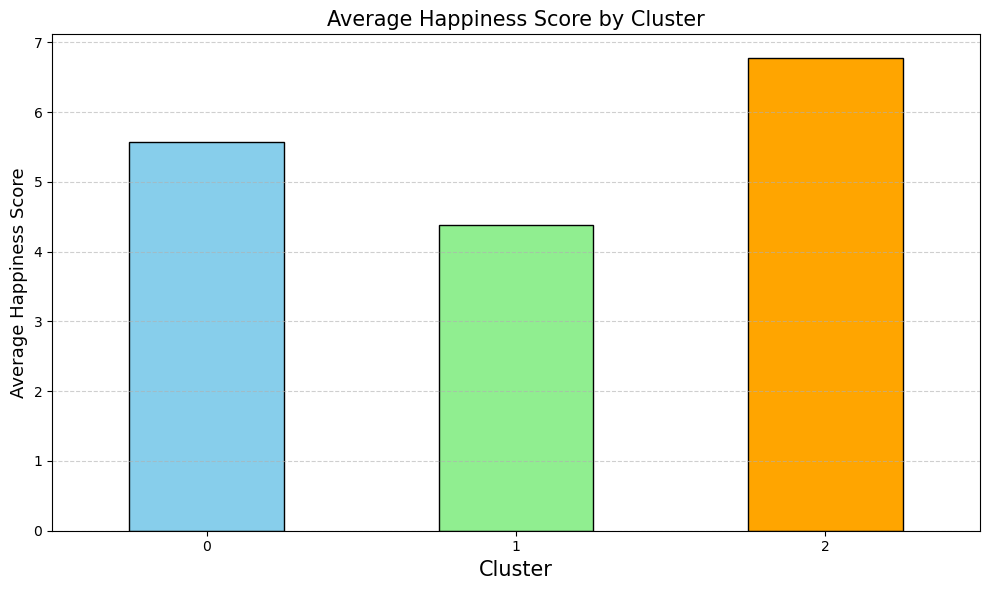

In [243]:
#to create a bar chart with clustering and fitting
def bar_chart(data, n_clusters=3):
    """
    generates a bar chart showing average happiness score by cluster.
    
    """

    # this step is to select features for clustering
    features = ["gdp_per_capita", "family", "health", "freedom", "generosity", "government_trust"]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    # this step is to perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data["Cluster"] = kmeans.fit_predict(data_scaled)

    # this step is to train linear regression model
    X = data[["gdp_per_capita"]]
    y = data["happiness_score"]
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    #this step is to calculate average happiness score by cluster
    cluster_avg = data.groupby("Cluster")["happiness_score"].mean()

    # this step is to plot a bar chart
    plt.figure(figsize=(10, 6))
    cluster_avg.plot(kind="bar", color=["skyblue", "lightgreen", "orange"], edgecolor="black")
    plt.title("Average Happiness Score by Cluster", fontsize=15)
    plt.xlabel("Cluster", fontsize=15)
    plt.ylabel("Average Happiness Score", fontsize=13)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
#this step is to display the bar chart by calling the function 
bar_chart(data, n_clusters=3)

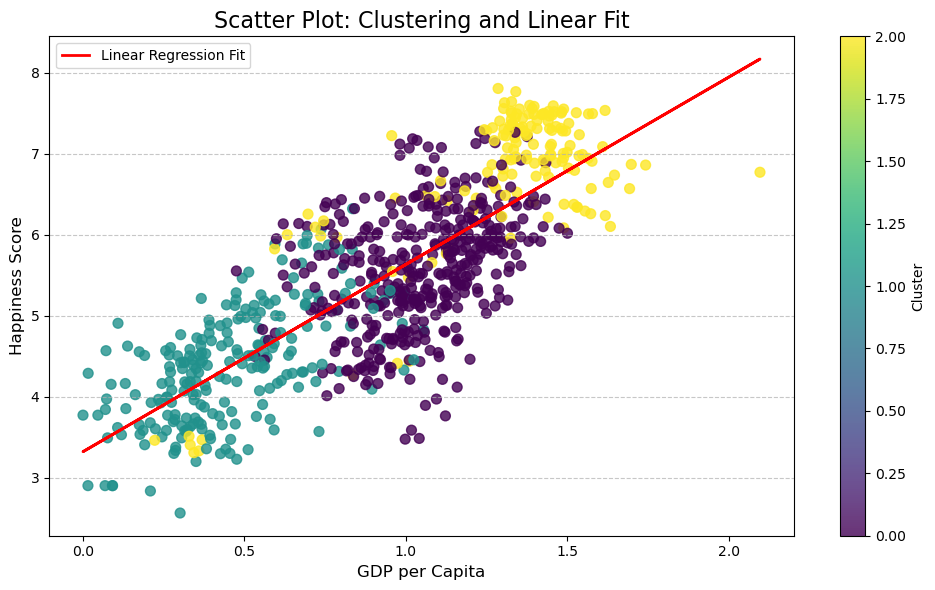

In [247]:
# to create a scatter graph using clustering and regression 
def plot_scatter(data, lin_reg, data_scaled, n_clusters=3):
    """
    generates a scatter plot with clustering and linear regression fit.

    Parameters:
    - n_clusters: Number of clusters for K-means
    """

    # this step is to select features for clustering
    features = ["gdp_per_capita", "family", "health", "freedom", "generosity", "government_trust"]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    # this step is to perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data["Cluster"] = kmeans.fit_predict(data_scaled)

    # this step is to train linear regression model
    X = data[["gdp_per_capita"]]
    y = data["happiness_score"]
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    # this step is to plot clustering and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(
        data["gdp_per_capita"],
        data["happiness_score"],
        c=data["Cluster"],  # clustering labels
        cmap="viridis",
        s=50,
        alpha=0.8,
        marker="o"
    )
    plt.title("Scatter Plot: Clustering and Linear Fit", fontsize=16)
    plt.xlabel("GDP per Capita", fontsize=12)
    plt.ylabel("Happiness Score", fontsize=12)

    # this step is to add regression line
    plt.plot(
        X,
        lin_reg.predict(X),
        color="red",
        linewidth=2,
        label="Linear Regression Fit"
    )

    plt.colorbar(label="Cluster")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
#this step is to display the scatter graph by calling the function 
plot_scatter(data, lin_reg, data_scaled)

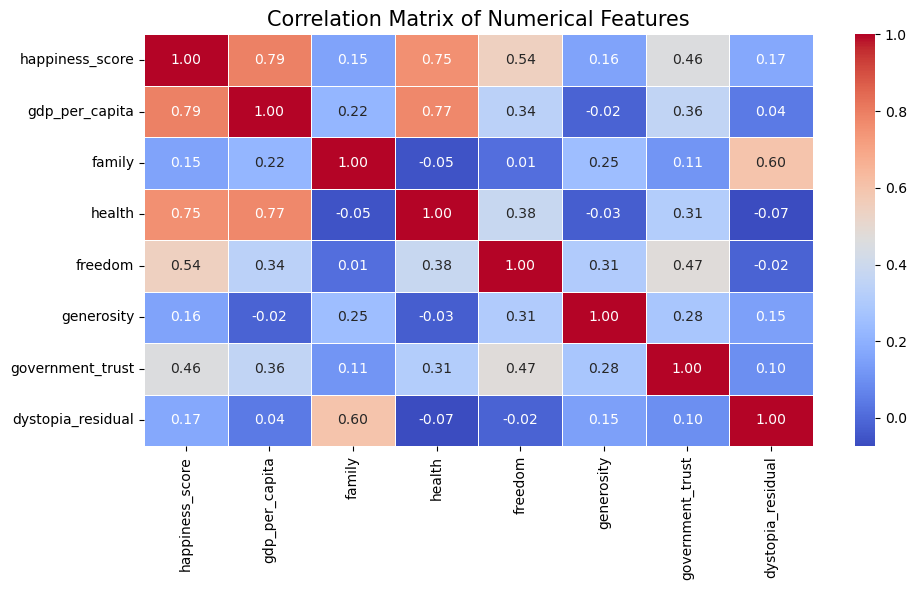

In [249]:
#to plot a heatmap
def plot_heatmap(data):
    """Plot heatmap for Correlation Matrix."""
    plt.figure(figsize=(10, 6))
    corr_matrix = data[["happiness_score", "gdp_per_capita", "family", "health", "freedom", "generosity", "government_trust", "dystopia_residual"]].corr()
    sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Numerical Features", fontsize=15)
    plt.tight_layout()
    plt.show()
#this step is to display the heatmap by calling the function 
plot_heatmap(data)

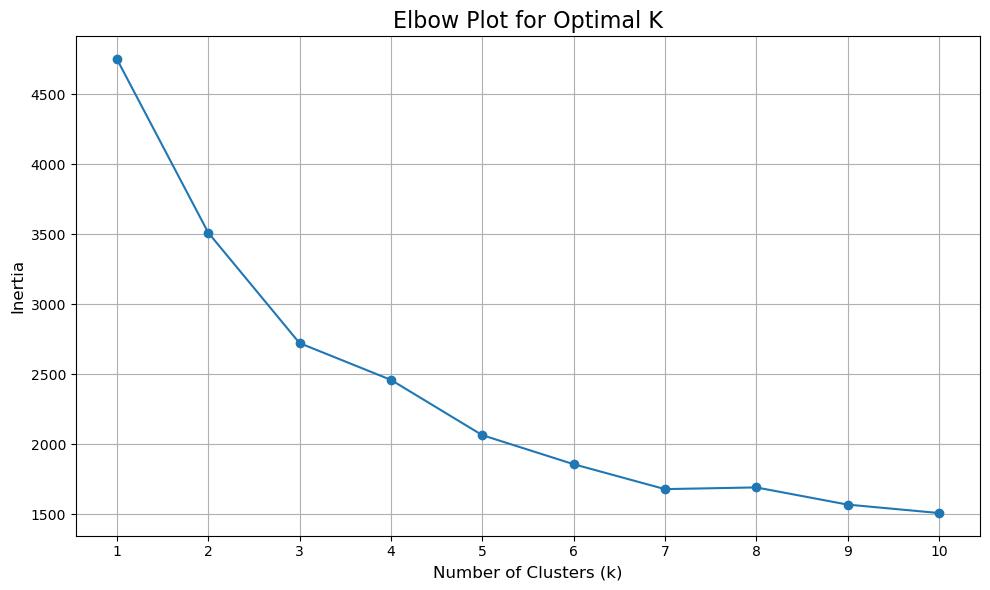

In [251]:
# to create a elbow plot 
#this step is to select numeric columns for clustering
numeric_cols = ["gdp_per_capita", "family", "health", "freedom", "generosity", "government_trust"]
data_numeric = data[numeric_cols]

# this step is to scale the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# this step is to define the plot_elbow function
def plot_elbow(data_scaled):
    """Plot Elbow Curve for Optimal Number of Clusters."""
    inertia = []
    k_values = range(1, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker="o", linestyle="-")
    plt.title("Elbow Plot for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (k)", fontsize=12)
    plt.ylabel("Inertia", fontsize=12)
    plt.xticks(k_values)
    plt.grid()
    plt.tight_layout()
    plt.show()

#this step is to display the elbow plot by calling the function 
plot_elbow(data_scaled)